In [1]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn umap-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt

# Forel 2024-25 Dataset Cleaning

In [3]:
df = pd.read_csv("../datasets/FOREL_2024_25.csv")
df.columns

Index(['TIMESTAMP_MIDDLE', 'FN2O_L3.3_CUT_50_QCF0',
       'NEE_L3.3_CUT_50_QCF0_gfXGBoost', 'GPP_U50_f_reddyproc',
       'Reco_U50_reddyproc', 'SW_IN_T1_2_1', 'TA_M1_2_1', 'PREC_M1_2_1', 'VPD',
       'TS_GF2_0.05_1_gfXG', 'TS_GF2_0.10_1_gfXG', 'TS_GF2_0.20_1_gfXG',
       'TS_GF2_0.30_1_gfXG', 'TS_GF2_0.40_1_gfXG', 'TS_GF2_0.50_1_gfXG',
       'SWC_GF2_0.05_1_gfXG', 'SWC_GF2_0.1_1_gfXG', 'SWC_GF2_0.2_1_gfXG',
       'SWC_GF2_0.3_1_gfXG', 'SWC_GF2_0.4_1_gfXG', 'SWC_GF2_0.5_1_gfXG',
       'MGMT_HARVEST', 'MGMT_FERT_ORG', 'MGMT_FERT_MIN'],
      dtype='object')

In [4]:
df.head(10)

,TIMESTAMP_MIDDLE,FN2O_L3.3_CUT_50_QCF0,NEE_L3.3_CUT_50_QCF0_gfXGBoost,GPP_U50_f_reddyproc,Reco_U50_reddyproc,SW_IN_T1_2_1,TA_M1_2_1,PREC_M1_2_1,VPD,TS_GF2_0.05_1_gfXG,TS_GF2_0.10_1_gfXG,TS_GF2_0.20_1_gfXG,TS_GF2_0.30_1_gfXG,TS_GF2_0.40_1_gfXG,TS_GF2_0.50_1_gfXG,SWC_GF2_0.05_1_gfXG,SWC_GF2_0.1_1_gfXG,SWC_GF2_0.2_1_gfXG,SWC_GF2_0.3_1_gfXG,SWC_GF2_0.4_1_gfXG,SWC_GF2_0.5_1_gfXG,MGMT_HARVEST,MGMT_FERT_ORG,MGMT_FERT_MIN
0,2024-03-06 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2024-03-07 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2024-03-07 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2024-03-07 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2024-03-07 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
5,2024-03-07 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
6,2024-03-07 02:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
7,2024-03-07 03:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
8,2024-03-07 03:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
9,2024-03-07 04:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [13]:
cols = [
    # Target
    "FN2O_L3.3_CUT_50_QCF0",

    # Timestamp
    "TIMESTAMP_MIDDLE",
    
    # Predictors
    "NEE_L3.3_CUT_50_QCF0_gfXGBoost",
    "GPP_U50_f_reddyproc",
    "Reco_U50_reddyproc",
    "SW_IN_T1_2_1",
    "TA_M1_2_1",
    "PREC_M1_2_1",
    "VPD",                     # Vapor pressure deficit
    "SWC_GF2_0.05_1_gfXG",
    "SWC_GF2_0.2_1_gfXG",
    "SWC_GF2_0.3_1_gfXG",
    "TS_GF2_0.05_1_gfXG",
    "TS_GF2_0.20_1_gfXG",
    "TS_GF2_0.30_1_gfXG",
    "MGMT_HARVEST",
    "MGMT_FERT_ORG",
    "MGMT_FERT_MIN",
]

forel_24_25 = df[cols]

rename_map = {
    "FN2O_L3.3_CUT_50_QCF0": "N2O_Flux",
    "TIMESTAMP_MIDDLE": "Timestamp",
    "NEE_L3.3_CUT_50_QCF0_gfXGBoost": "NEE",    # Net CO₂ exchange between field and atmosphere (positive = CO₂ released, negative = CO₂ uptake)
    "GPP_U50_f_reddyproc": "GPP",                   # Total CO₂ fixed by photosynthesis (proxy for plant growth)
    "Reco_U50_reddyproc": "RECO",                   # CO₂ emitted via respiration of plants and soil organisms
    "SW_IN_T1_2_1": "SolarRadiation",
    "TA_M1_2_1": "AirTemp",
    "PREC_M1_2_1": "Precipitation",
    "SWC_GF2_0.05_1_gfXG": "SoilWater_5cm",
    "SWC_GF2_0.2_1_gfXG": "SoilWater_15cm",
    "SWC_GF2_0.3_1_gfXG": "SoilWater_30cm",
    "TS_GF2_0.05_1_gfXG": "SoilTemp_5cm",
    "TS_GF2_0.20_1_gfXG": "SoilTemp_15cm",
    "TS_GF2_0.30_1_gfXG": "SoilTemp_30cm",
    "MGMT_HARVEST": "Mowing",
    "MGMT_FERT_ORG": "FertilizerOrganic",
    "MGMT_FERT_MIN": "FertilizerMineral",
    "MGMT_SOILCULTIVATION": "SoilCultivation",
}

forel = forel_24_25.rename(columns=rename_map)

forel["Timestamp"] = pd.to_datetime(forel["Timestamp"])
forel = forel.sort_values("Timestamp")

# Remove duplicate timestamps if any
forel = forel.drop_duplicates(subset=["Timestamp"], keep="first")

forel["year"] = forel["Timestamp"].dt.year
forel["month"] = forel["Timestamp"].dt.month
forel["hour"] = forel["Timestamp"].dt.hour
forel["day"] = forel["Timestamp"].dt.day

# --- Prepare for lag feature computation ---
forel = forel.set_index("Timestamp").sort_index()

# Continuous predictors for lags
meteo_predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm"
]

lags_days = [1, 3, 5, 7]

# Compute lags
for var in meteo_predictors:
    for lag in lags_days:
        forel[f"{var}_lag{lag}d"] = forel[var].shift(freq=pd.Timedelta(days=lag))


# NOW compute days since events on the daily data
def days_since_event_daily(series, max_days=30):
    """Days since last management event, capped at max_days."""
    days = np.full(len(series), max_days, dtype=float)
    last_event_idx = None
    
    for i in range(len(series)):
        if series.iloc[i] == 1:
            last_event_idx = i
            days[i] = 0
        elif last_event_idx is not None:
            days[i] = min(i - last_event_idx, max_days)
        else:
            days[i] = max_days
    
    return days

for event in ["Mowing", "FertilizerOrganic", "FertilizerMineral"]:
    forel[f"DaysSince_{event}"] = days_since_event_daily(forel[event])

# --- transformation ---
forel = forel[forel["N2O_Flux"].notna()]
forel["N2O_Flux_ln"] = np.where(
    forel["N2O_Flux"] > 0,
    np.log1p(forel["N2O_Flux"]),
    0  # replace neg with 0
)

In [14]:
forel.head(10)

,N2O_Flux,NEE,GPP,RECO,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Mowing,FertilizerOrganic,FertilizerMineral,year,month,hour,day,NEE_lag1d,NEE_lag3d,NEE_lag5d,NEE_lag7d,GPP_lag1d,GPP_lag3d,GPP_lag5d,GPP_lag7d,RECO_lag1d,RECO_lag3d,RECO_lag5d,RECO_lag7d,SolarRadiation_lag1d,SolarRadiation_lag3d,SolarRadiation_lag5d,SolarRadiation_lag7d,AirTemp_lag1d,AirTemp_lag3d,AirTemp_lag5d,AirTemp_lag7d,Precipitation_lag1d,Precipitation_lag3d,Precipitation_lag5d,Precipitation_lag7d,VPD_lag1d,VPD_lag3d,VPD_lag5d,VPD_lag7d,SoilWater_5cm_lag1d,SoilWater_5cm_lag3d,SoilWater_5cm_lag5d,SoilWater_5cm_lag7d,SoilWater_15cm_lag1d,SoilWater_15cm_lag3d,SoilWater_15cm_lag5d,SoilWater_15cm_lag7d,SoilWater_30cm_lag1d,SoilWater_30cm_lag3d,SoilWater_30cm_lag5d,SoilWater_30cm_lag7d,SoilTemp_5cm_lag1d,SoilTemp_5cm_lag3d,SoilTemp_5cm_lag5d,SoilTemp_5cm_lag7d,SoilTemp_15cm_lag1d,SoilTemp_15cm_lag3d,SoilTemp_15cm_lag5d,SoilTemp_15cm_lag7d,SoilTemp_30cm_lag1d,SoilTemp_30cm_lag3d,SoilTemp_30cm_lag5d,SoilTemp_30cm_lag7d,DaysSince_Mowing,DaysSince_FertilizerOrganic,DaysSince_FertilizerMineral,N2O_Flux_ln
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-03-07 21:15:00,-0.515732,2.552769,1.281918,3.834688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2024,3,21,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,30.0,30.0,0.000000
2024-03-08 00:15:00,0.159603,3.875151,0.651049,4.526200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2024,3,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.148077
2024-03-08 00:45:00,-0.089344,4.162287,0.697016,4.859303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2024,3,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.000000
2024-03-08 01:15:00,0.219773,3.077020,2.107195,5.184215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2024,3,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.198665
2024-03-08 01:45:00,-0.114102,2.601479,2.552414,5.153893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2024,3,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.000000
2024-03-08 02:15:00,0.240983,2.781758,2.322985,5.104743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2024,3,2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.215904
2024-03-08 02:45:00,0.115659,3.223619,1.843185,5.066804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2024,3,2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.109445
2024-03-08 03:45:00,0.099676,2.613191,2.408281,5.021473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2024,3,3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Further Analysis and Checks

In [15]:
# Ensure timestamp is datetime and sorted (already done by setting it as index)
# aeschi is already sorted by index since we used set_index() and sort_index()

# Compute time difference between consecutive timestamps using the index
forel["time_diff"] = forel.index.to_series().diff()

# Look at large gaps
print(forel["time_diff"].describe())
forel[forel["time_diff"] > pd.Timedelta("3 days")].head(50)

count                         6660
mean     0 days 01:31:10.270270270
std      0 days 03:19:14.304003950
min                0 days 00:30:00
25%                0 days 00:30:00
50%                0 days 00:30:00
75%                0 days 01:00:00
max                5 days 17:30:00
Name: time_diff, dtype: object


,N2O_Flux,NEE,GPP,RECO,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Mowing,FertilizerOrganic,FertilizerMineral,year,month,hour,day,NEE_lag1d,NEE_lag3d,NEE_lag5d,NEE_lag7d,GPP_lag1d,GPP_lag3d,GPP_lag5d,GPP_lag7d,RECO_lag1d,RECO_lag3d,RECO_lag5d,RECO_lag7d,SolarRadiation_lag1d,SolarRadiation_lag3d,SolarRadiation_lag5d,SolarRadiation_lag7d,AirTemp_lag1d,AirTemp_lag3d,AirTemp_lag5d,AirTemp_lag7d,Precipitation_lag1d,Precipitation_lag3d,Precipitation_lag5d,Precipitation_lag7d,VPD_lag1d,VPD_lag3d,VPD_lag5d,VPD_lag7d,SoilWater_5cm_lag1d,SoilWater_5cm_lag3d,SoilWater_5cm_lag5d,SoilWater_5cm_lag7d,SoilWater_15cm_lag1d,SoilWater_15cm_lag3d,SoilWater_15cm_lag5d,SoilWater_15cm_lag7d,SoilWater_30cm_lag1d,SoilWater_30cm_lag3d,SoilWater_30cm_lag5d,SoilWater_30cm_lag7d,SoilTemp_5cm_lag1d,SoilTemp_5cm_lag3d,SoilTemp_5cm_lag5d,SoilTemp_5cm_lag7d,SoilTemp_15cm_lag1d,SoilTemp_15cm_lag3d,SoilTemp_15cm_lag5d,SoilTemp_15cm_lag7d,SoilTemp_30cm_lag1d,SoilTemp_30cm_lag3d,SoilTemp_30cm_lag5d,SoilTemp_30cm_lag7d,DaysSince_Mowing,DaysSince_FertilizerOrganic,DaysSince_FertilizerMineral,N2O_Flux_ln,time_diff
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-01-01 03:15:00,0.426902,3.121169,-1.949803,1.171366,0.0,-2.58,0.0,0.015502,40.332018,38.767796,36.487347,1.7775,3.394167,4.300833,0.0,0.0,0.0,2025,1,3,1,1.094077,0.990351,1.31033,1.492115,0.438966,1.043635,0.073283,0.165679,1.63799,2.009002,1.458349,1.216797,0.0,0.0,0.0,0.0,-0.19,0.23,-2.333333,-1.726667,0.0,0.0,0.0,0.0,0.0,0.0,0.000086,0.017431,40.464547,42.277532,40.484788,40.792131,38.791616,39.734276,38.71836,39.062037,36.74165,37.168343,36.484584,36.701624,3.5,2.9,3.0,3.0,3.9975,3.393333,3.498333,3.5,4.619167,4.1,4.29,4.300833,30.0,30.0,30.0,0.355505,5 days 17:30:00


In [17]:
# First, aggregate to daily WITHOUT the DaysSince features
forel["Date"] = forel.index.floor("D")

forel_daily = (
    forel
    .groupby(["Date"], dropna=False)
    .agg({
        # Continuous fluxes and predictors — daily mean
        "N2O_Flux": "mean",
        "NEE": "mean",
        "GPP": "mean",
        "RECO": "mean",
        "SolarRadiation": "mean",
        "AirTemp": "mean",
        "VPD": "mean",
        "SoilWater_5cm": "mean",
        "SoilWater_15cm": "mean",
        "SoilWater_30cm": "mean",
        "SoilTemp_5cm": "mean",
        "SoilTemp_15cm": "mean",
        "SoilTemp_30cm": "mean",

        # Precipitation — total per day
        "Precipitation": "sum",

        # Management events — any event that day
        "Mowing": "max",
        "FertilizerOrganic": "max",
        "FertilizerMineral": "max",

        # Days since management — take min (closest to event)
        "DaysSince_Mowing": "min",
        "DaysSince_FertilizerOrganic": "min",
        "DaysSince_FertilizerMineral": "min",
    })
    .reset_index()
    .sort_values(["Date"])
)

# ==========================================================
# --- Compute lag features (calendar-based) ---
# ==========================================================
meteo_predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm"
]
lags_days = [1, 3, 5, 7]

forel_daily = forel_daily.sort_values("Date").set_index("Date")

for var in meteo_predictors:
    for lag in lags_days:
        forel_daily[f"{var}_lag{lag}d"] = forel_daily[var].shift(freq=pd.Timedelta(days=lag))

forel_daily = forel_daily.reset_index()

# ==========================================================
# --- Add temporal helpers and filter ---
# ==========================================================
forel_daily["Date"] = pd.to_datetime(forel_daily["Date"])
forel_daily["year"] = forel_daily["Date"].dt.year
forel_daily["month"] = forel_daily["Date"].dt.month
forel_daily = forel_daily[forel_daily["N2O_Flux"].notna()]

# ==========================================================
# --- Recalculate log-transform (after aggregation) ---
# ==========================================================
forel_daily["N2O_Flux_ln"] = np.where(
    forel_daily["N2O_Flux"] > 0,
    np.log1p(forel_daily["N2O_Flux"]),
    0
)

print(f"Oensingen daily: {forel_daily.shape}")
forel_daily.head(10)

Oensingen daily: (414, 76)


,Date,N2O_Flux,NEE,GPP,RECO,SolarRadiation,AirTemp,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Precipitation,Mowing,FertilizerOrganic,FertilizerMineral,DaysSince_Mowing,DaysSince_FertilizerOrganic,DaysSince_FertilizerMineral,NEE_lag1d,NEE_lag3d,NEE_lag5d,NEE_lag7d,GPP_lag1d,GPP_lag3d,GPP_lag5d,GPP_lag7d,RECO_lag1d,RECO_lag3d,RECO_lag5d,RECO_lag7d,SolarRadiation_lag1d,SolarRadiation_lag3d,SolarRadiation_lag5d,SolarRadiation_lag7d,AirTemp_lag1d,AirTemp_lag3d,AirTemp_lag5d,AirTemp_lag7d,Precipitation_lag1d,Precipitation_lag3d,Precipitation_lag5d,Precipitation_lag7d,VPD_lag1d,VPD_lag3d,VPD_lag5d,VPD_lag7d,SoilWater_5cm_lag1d,SoilWater_5cm_lag3d,SoilWater_5cm_lag5d,SoilWater_5cm_lag7d,SoilWater_15cm_lag1d,SoilWater_15cm_lag3d,SoilWater_15cm_lag5d,SoilWater_15cm_lag7d,SoilWater_30cm_lag1d,SoilWater_30cm_lag3d,SoilWater_30cm_lag5d,SoilWater_30cm_lag7d,SoilTemp_5cm_lag1d,SoilTemp_5cm_lag3d,SoilTemp_5cm_lag5d,SoilTemp_5cm_lag7d,SoilTemp_15cm_lag1d,SoilTemp_15cm_lag3d,SoilTemp_15cm_lag5d,SoilTemp_15cm_lag7d,SoilTemp_30cm_lag1d,SoilTemp_30cm_lag3d,SoilTemp_30cm_lag5d,SoilTemp_30cm_lag7d,year,month,N2O_Flux_ln
0,2024-03-07,-0.515732,2.552769,1.281918,3.834688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.0,0.0,30.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,0.000000
1,2024-03-08,0.156168,-3.255464,8.540835,5.285371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,1.0,1.0,30.0,0.0,0.0,2.552769,NaN,NaN,NaN,1.281918,NaN,NaN,NaN,3.834688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,0.145111
2,2024-03-09,3.627624,-0.009357,4.938120,5.157272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.0,0.0,30.0,19.0,19.0,-3.255464,NaN,NaN,NaN,8.540835,NaN,NaN,NaN,5.285371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,1.532044
3,2024-03-10,4.069760,1.798853,2.741931,5.023485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.0,0.0,30.0,30.0,30.0,-0.009357,2.552769,NaN,NaN,4.938120,1.281918,NaN,NaN,5.157272,3.834688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,1.623294
4,2024-03-11,8.397189,-4.404880,9.887499,5.391717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.0,0.0,30.0,30.0,30.0,1.798853,-3.255464,NaN,NaN,2.741931,8.540835,NaN,NaN,5.023485,5.285371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,2.240411
5,2024-03-12,4.955343,1.947836,2.543503,4.631664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.0,0.0,30.0,30.0,30.0,-4.404880,-0.009357,2.552769,NaN,9.887499,4.938120,1.281918,NaN,5.391717,5.157272,3.834688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,1.784289
6,2024-03-13,4.868779,-3.031612,8.351813,5.359081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0,0.0,0.0,30.0,30.0,30.0,1.947836,1.798853,-3.255464,NaN,2.543503,2.741931,8.540835,NaN,4.631664,5.023485,5.285371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,1.769647
7,2024-03-14,2.718764,-8.312566,14.060676,5.685062,458.643791,9.982554,0.329320,30.375668,31.136858,28.330783,11.764863,7.827736,7.668822,0.000,0.0,0.0,0.0,30.0,30.0,30.0,-3.031612,-4.404880,-0.009357,2.552769,8.351813,9.887499,4.938120,1.281918,5.35

In [18]:
fert_info = pd.read_csv("../datasets/FertilizationInfo_DataScienceLab/fertilizer_N_amounts_FOREL.csv")

# --- Convert fert_info["date"] (yyyymmdd int/string) to datetime ---
# Handles both integer and string formats automatically
forel_daily["Date"] = pd.to_datetime(forel_daily["Date"], errors="coerce")
fert_info["date"] = pd.to_datetime(fert_info["date"].astype(str), format="%Y%m%d", errors="coerce")

# --- Merge on Date only (no Parcel for Oensingen) ---
forel_daily = forel_daily.merge(
    fert_info,
    how="left",
    left_on="Date",
    right_on="date"
)

# --- Clean up redundant columns if desired ---
forel_daily.drop(columns=["date"], inplace=True)

# --- Optional: rename fertilizer column for clarity ---
forel_daily.rename(columns={"N(kg/ha)": "Fertilizer_N_kg_ha"}, inplace=True)

# --- Set Date back as index if desired ---
forel_daily = forel_daily.set_index("Date").sort_index()

forel_daily.head()

,N2O_Flux,NEE,GPP,RECO,SolarRadiation,AirTemp,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Precipitation,Mowing,FertilizerOrganic,FertilizerMineral,DaysSince_Mowing,DaysSince_FertilizerOrganic,DaysSince_FertilizerMineral,NEE_lag1d,NEE_lag3d,NEE_lag5d,NEE_lag7d,GPP_lag1d,GPP_lag3d,GPP_lag5d,GPP_lag7d,RECO_lag1d,RECO_lag3d,RECO_lag5d,RECO_lag7d,SolarRadiation_lag1d,SolarRadiation_lag3d,SolarRadiation_lag5d,SolarRadiation_lag7d,AirTemp_lag1d,AirTemp_lag3d,AirTemp_lag5d,AirTemp_lag7d,Precipitation_lag1d,Precipitation_lag3d,Precipitation_lag5d,Precipitation_lag7d,VPD_lag1d,VPD_lag3d,VPD_lag5d,VPD_lag7d,SoilWater_5cm_lag1d,SoilWater_5cm_lag3d,SoilWater_5cm_lag5d,SoilWater_5cm_lag7d,SoilWater_15cm_lag1d,SoilWater_15cm_lag3d,SoilWater_15cm_lag5d,SoilWater_15cm_lag7d,SoilWater_30cm_lag1d,SoilWater_30cm_lag3d,SoilWater_30cm_lag5d,SoilWater_30cm_lag7d,SoilTemp_5cm_lag1d,SoilTemp_5cm_lag3d,SoilTemp_5cm_lag5d,SoilTemp_5cm_lag7d,SoilTemp_15cm_lag1d,SoilTemp_15cm_lag3d,SoilTemp_15cm_lag5d,SoilTemp_15cm_lag7d,SoilTemp_30cm_lag1d,SoilTemp_30cm_lag3d,SoilTemp_30cm_lag5d,SoilTemp_30cm_lag7d,year,month,N2O_Flux_ln,Fertilizer_N_kg_ha,Unnamed: 2
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-03-07,-0.515732,2.552769,1.281918,3.834688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,30.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,0.000000,NaN,NaN
2024-03-08,0.156168,-3.255464,8.540835,5.285371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,30.0,0.0,0.0,2.552769,NaN,NaN,NaN,1.281918,NaN,NaN,NaN,3.834688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,0.145111,NaN,NaN
2024-03-09,3.627624,-0.009357,4.938120,5.157272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,30.0,19.0,19.0,-3.255464,NaN,NaN,NaN,8.540835,NaN,NaN,NaN,5.285371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,1.532044,NaN,NaN
2024-03-10,4.069760,1.798853,2.741931,5.023485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,30.0,30.0,30.0,-0.009357,2.552769,NaN,NaN,4.938120,1.281918,NaN,NaN,5.157272,3.834688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,1.623294,NaN,NaN
2024-03-11,8.397189,-4.404880,9.887499,5.391717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,30.0,30.0,30.0,1.798853,-3.255464,NaN,NaN,2.741931,8.540835,NaN,NaN,5.023485,5.285371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,3,2.240411,NaN,NaN


In [19]:
forel.to_csv("../datasets/Forel_2024-25_clean.csv")
forel_daily.to_csv("../datasets/Forel_Daily_2024-25_clean.csv")

In [20]:
forel_daily[forel_daily["Fertilizer_N_kg_ha"].notna()]

,N2O_Flux,NEE,GPP,RECO,SolarRadiation,AirTemp,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Precipitation,Mowing,FertilizerOrganic,FertilizerMineral,DaysSince_Mowing,DaysSince_FertilizerOrganic,DaysSince_FertilizerMineral,NEE_lag1d,NEE_lag3d,NEE_lag5d,NEE_lag7d,GPP_lag1d,GPP_lag3d,GPP_lag5d,GPP_lag7d,RECO_lag1d,RECO_lag3d,RECO_lag5d,RECO_lag7d,SolarRadiation_lag1d,SolarRadiation_lag3d,SolarRadiation_lag5d,SolarRadiation_lag7d,AirTemp_lag1d,AirTemp_lag3d,AirTemp_lag5d,AirTemp_lag7d,Precipitation_lag1d,Precipitation_lag3d,Precipitation_lag5d,Precipitation_lag7d,VPD_lag1d,VPD_lag3d,VPD_lag5d,VPD_lag7d,SoilWater_5cm_lag1d,SoilWater_5cm_lag3d,SoilWater_5cm_lag5d,SoilWater_5cm_lag7d,SoilWater_15cm_lag1d,SoilWater_15cm_lag3d,SoilWater_15cm_lag5d,SoilWater_15cm_lag7d,SoilWater_30cm_lag1d,SoilWater_30cm_lag3d,SoilWater_30cm_lag5d,SoilWater_30cm_lag7d,SoilTemp_5cm_lag1d,SoilTemp_5cm_lag3d,SoilTemp_5cm_lag5d,SoilTemp_5cm_lag7d,SoilTemp_15cm_lag1d,SoilTemp_15cm_lag3d,SoilTemp_15cm_lag5d,SoilTemp_15cm_lag7d,SoilTemp_30cm_lag1d,SoilTemp_30cm_lag3d,SoilTemp_30cm_lag5d,SoilTemp_30cm_lag7d,year,month,N2O_Flux_ln,Fertilizer_N_kg_ha,Unnamed: 2
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


# Analysis plots

# PCA plots

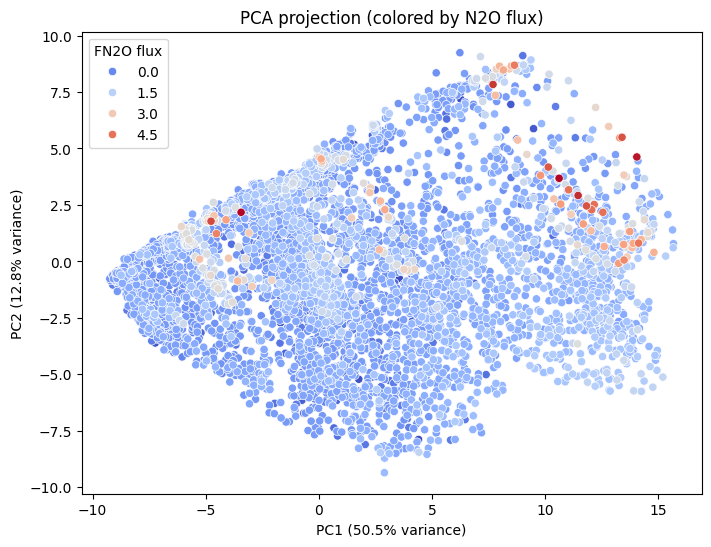

In [22]:
forel_clean = forel.dropna()
forel_clean = forel_clean.sort_values(
    by="N2O_Flux",
    ascending=True  # ascending puts zeros first, descending puts them last
)

X_2 = forel_clean.drop(columns=["N2O_Flux", "time_diff", "Date"])
y_2 = forel_clean["N2O_Flux"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize predictors
X_scaled_2 = StandardScaler().fit_transform(X_2)

# Run PCA (2 components for visualization)
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled_2)

# Create DataFrame for plotting
pca_df_2 = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
pca_df_2["FN2O"] = y_2.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df_2, x="PC1", y="PC2", hue="FN2O", palette="coolwarm")
plt.title("PCA projection (colored by N2O flux)")
plt.xlabel(f"PC1 ({pca_2.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca_2.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="FN2O flux", loc="best")
plt.show()

In [23]:
loadings = pd.DataFrame(
    pca_2.components_.T,
    index=X_2.columns,
    columns=["PC1", "PC2"]
)
print(loadings.sort_values("PC1", ascending=False))

                           PC1       PC2
SoilTemp_5cm_lag3d    0.151218  0.066749
SoilTemp_5cm_lag5d    0.151186  0.070907
SoilTemp_5cm_lag7d    0.150999  0.073251
SoilTemp_5cm_lag1d    0.150729  0.061141
SoilTemp_5cm          0.150272  0.056390
...                        ...       ...
SoilWater_30cm       -0.135516 -0.045097
SoilWater_15cm_lag5d -0.137067 -0.091006
SoilWater_15cm_lag3d -0.141649 -0.079985
SoilWater_15cm_lag1d -0.144362 -0.063830
SoilWater_15cm       -0.145075 -0.050920

[76 rows x 2 columns]


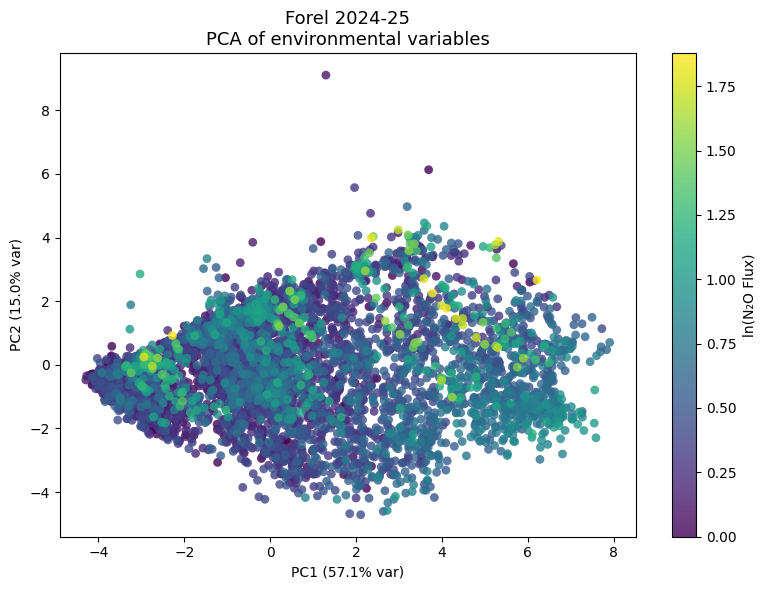

In [24]:
import matplotlib.cm as cm

# --- transformation ---
forel_clean["N2O_Flux_ln"] = np.where(
    forel_clean["N2O_Flux"] > 0,
    np.log1p(forel_clean["N2O_Flux"]),
    0
)

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral"
]

def plot_pca(df, title):
    # Drop rows with missing values in required columns
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()
    
    # Standardize variables
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])
    
    # Run PCA
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)
    df_clean["PC1"] = pcs[:, 0]
    df_clean["PC2"] = pcs[:, 1]

    # Sort by N2O_Flux (so larger appear on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["PC1"], df_clean["PC2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    # Labels and aesthetics
    ax.set_title(f"{title}\nPCA of environmental variables", fontsize=13)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for forel 2024-25
# =============================================
plot_pca(forel_clean, "Forel 2024-25")

# t-SNE plots

In [27]:
from sklearn.preprocessing import StandardScaler

# Drop or fill NaNs
X_2 = X_2.dropna()
y_2 = y_2.loc[X_2.index]

# Scale predictors
X_scaled_2 = StandardScaler().fit_transform(X_2)

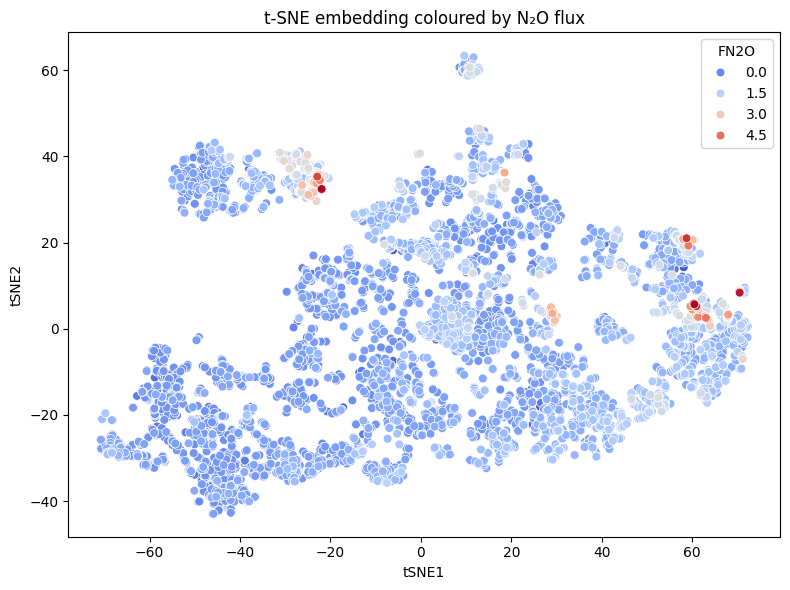

In [28]:
from sklearn.manifold import TSNE

tsne_2 = TSNE(n_components=2, perplexity=90, random_state=42)
X_tsne_2 = tsne_2.fit_transform(X_scaled_2)

tsne_df_2 = pd.DataFrame(X_tsne_2, columns=["tSNE1", "tSNE2"])
tsne_df_2["FN2O"] = y_2.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df_2, x="tSNE1", y="tSNE2",
    hue="FN2O", palette="coolwarm", s=40
)
plt.title("t-SNE embedding coloured by N₂O flux")
plt.tight_layout()
plt.show()

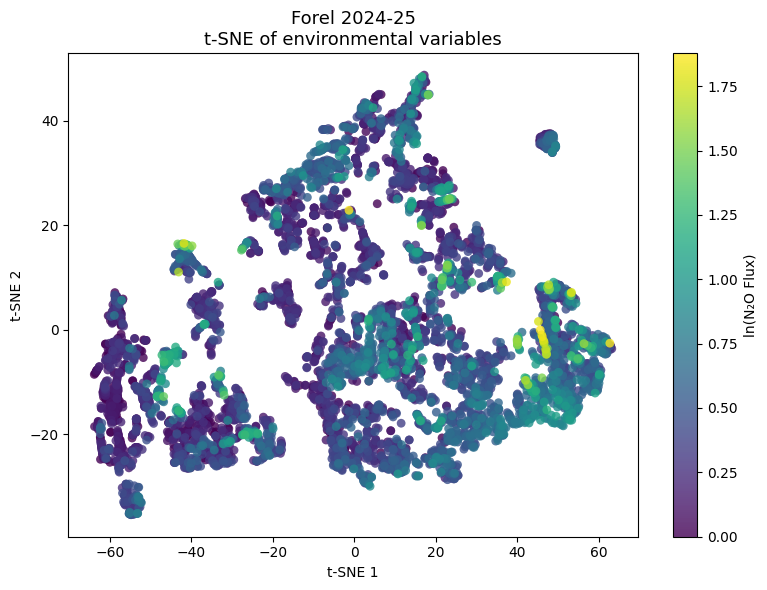

In [29]:
# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral"
]

def plot_tsne(df, title, perplexity=100, learning_rate=200, random_state=42):
    # Drop missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize features
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        init="pca",
        random_state=random_state
    )
    tsne_results = tsne.fit_transform(X_scaled)

    df_clean["tSNE1"] = tsne_results[:, 0]
    df_clean["tSNE2"] = tsne_results[:, 1]

    # Sort by N2O_Flux for plotting order
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["tSNE1"], df_clean["tSNE2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    ax.set_title(f"{title}\nt-SNE of environmental variables", fontsize=13)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Forel 2024-25
# =============================================
plot_tsne(forel_clean, "Forel 2024-25")

# UMAP plots

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


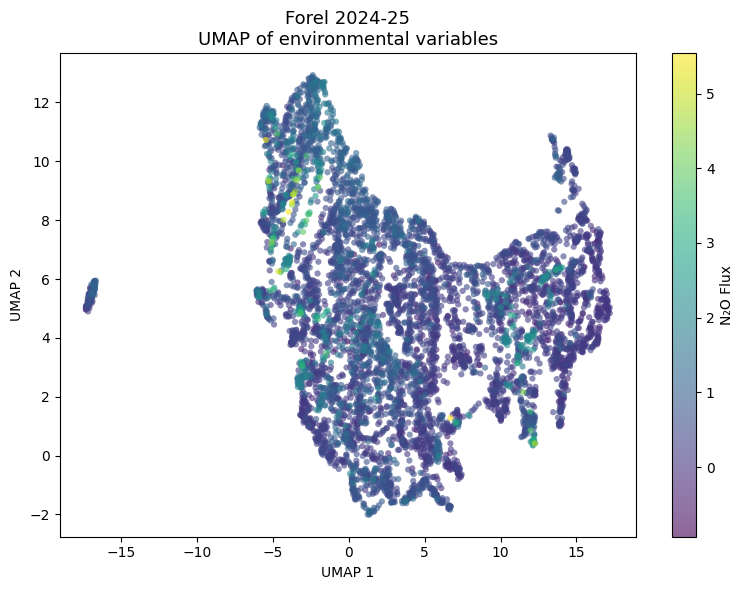

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral"
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("N₂O Flux")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Forel 2024-25
# =============================================
plot_umap(forel_clean, "Forel 2024-25")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


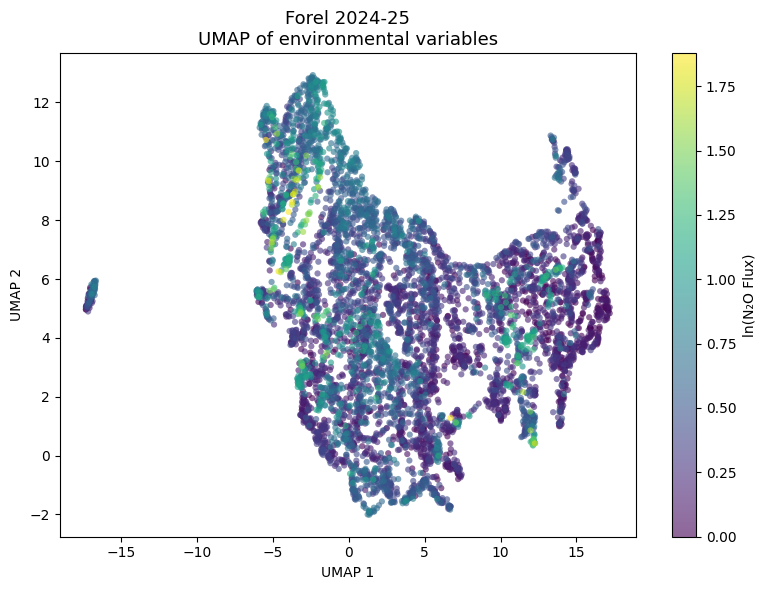

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral"
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Forel 2024-25
# =============================================
plot_umap(forel_clean, "Forel 2024-25")